## Part 3 Loading Data & EDA

Import relevant packages for the following parts

In [1]:
import numpy as np
import pandas as pd
import math
import re
import sys

from gensim.models.word2vec import Word2Vec

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from preprocessing import get_processed_data
import csv

### Import data cleaned by using the selfwritten preprocessing module

In [57]:
moria_df_loaded=get_processed_data('moria-data')


loading files...
C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data/
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 1.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 10.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 2.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 3.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business Scho

In [123]:
#to avoid reloading and preprocessing data
moria_df = moria_df_loaded.copy()

# reset index
moria_df.reset_index(drop=True, inplace=True)
#maybe we should keep the one with highest Reach? or other metric?
moria_df.sort_values(by='Reach',ascending=False,ignore_index=True, inplace=True)

moria_df.shape
#moria_df.head()

(188728, 32)

In [76]:

#remove all duplicate tweets (should be in preprocessing file?)
moria_df.drop_duplicates(subset ="Tweet Raw", inplace = True) 
moria_df.shape




(56898, 32)

In [124]:
moria_df["Tweet Clean"].value_counts()

rt   absolute destruction at  moria camp visible with the first ray of light this morning  approx        people will have nowhere to sleep tonight  not even the frail tents they used to call home  video by  moutafis    greece  lesvos  lesbos  migrants  refugeesgr                                                                                                                                                                                                                                                                                                   2727
qt   rt   nope     a few weeks ago just over      immigrants were left at sea   greece is where i need to be right now                                                                                                                                                                                                                                                                                                                                   

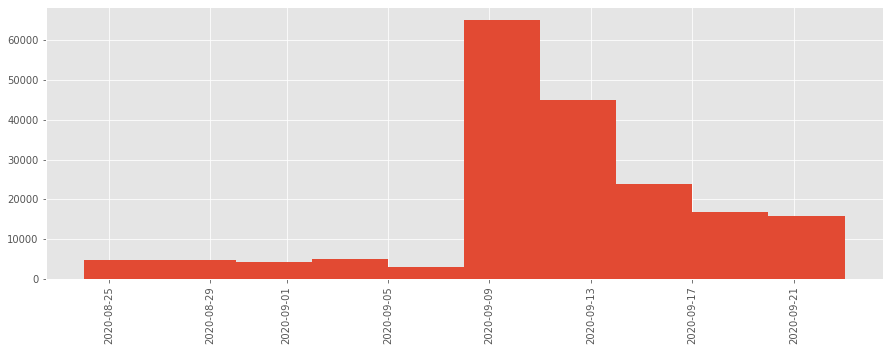

In [125]:

#type(contents)

#set short date as index
moria_df['Date Short'] = pd.to_datetime(moria_df['Date Short'])
moria_df = moria_df.set_index(moria_df['Date Short'])
moria_df = moria_df.sort_index()

#moria_df['Date Short'].sort_values()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

moria_df['Date Short'].hist()

In [126]:
event_date = '2020-09-08'


# create train test partition
pre_event = moria_df[:event_date]
post_event  = moria_df[event_date:]


#pre_event = moria_df.loc(moria_df['Date Short'] < event_date)
#post_event = moria_df.loc(moria_df['Date Short']>= event_date)

print('Pre event tweets: ',pre_event.shape[0])
print('Post event tweets: ',post_event.shape[0])


Pre event tweets:  23214
Post event tweets:  166764


In [127]:

#pre_event.info()
pre_event.sort_values(by='Reach',ascending=False,ignore_index=True)
#post_event['Reach'].sort_values()

#pre_event.head(10)

,Date,URL,Tweet Raw,Influencer,Country,Language,Reach,Engagement,AVE,Sentiment,...,Time,State,City,Hashtags,Mentions,Linked Content,Retweet,Quote Tweet,Tweet Clean,Tweet Clean Tokens
0,02-Sep-2020 03:45PM,https://twitter.com/nytimes/statuses/1301154200110411778,Greece reported the first case of the coronavirus in the Moria camp for migrants on the island of Lesbos. Latest updates: https://t.co/WQMXjTzjKT https://t.co/qKob3IOVK7,@nytimes,United States,English,47230169,NaN,436879.06,Neutral,...,3:45 PM,New York,New York City,[],[],"[https://t.co/WQMXjTzjKT, https://t.co/qKob3IOVK7]",False,False,greece reported the first case of the coronavirus in the moria camp for migrants on the island of lesbos latest updates,"[greece, reported, first, case, coronavirus, moria, camp, migrant, island, lesbos, latest, update]"
1,31-Aug-2020 09:58PM,https://twitter.com/BBCWorld/statuses/1300523327023394817,"Almost 900,000 migrants arrived in Greece back in 2015, but the sympathy and welcome shown by some Greeks has now largely evaporated @bbclysedoucet meets people who have travelled from Afghanistan and Syria https://t.co/2cKYHmC4tr https://t.co/rkAh53ycAO",@bbcworld,United Kingdom,English,28853971,NaN,266899.23,Neutral,...,9:58 PM,England,London,[],[bbclysedoucet],"[https://t.co/2cKYHmC4tr, https://t.co/rkAh53ycAO]",False,False,almost migrants arrived in greece back in but the sympathy and welcome shown by some greeks has now largely evaporated bbclysedoucet meets people who have travelled from afghanistan and syria,"[almost, migrant, arrived, greece, back, sympathy, welcome, shown, greek, largely, evaporated, bbclysedoucet, meet, people, travelled, afghanistan, syria]"
2,08-Sep-2020 08:28PM,https://twitter.com/ABC/statuses/1303399711706148864,"A major testing and contact-tracing operation at Greece's largest migrant camp on the eastern island of Lesbos has so far detected 17 confirmed cases of COVID-19 among the overcrowded facility's 12,500 residents, authorities say. https://t.co/Im6pGHULY7",@abc,United States,English,15881161,NaN,146900.74,Neutral,...,8:28 PM,New York,New York City,[],[],[https://t.co/Im6pGHULY7],False,False,a major testing and contact tracing operation at greece s largest migrant camp on the eastern island of lesbos has so far detected confirmed cases of covid among the overcrowded facility s residents authorities say,"[major, testing, contact, tracing, operation, greece, largest, migrant, camp, eastern, island, lesbos, detected, confirmed, case, covid, among, overcrowded, facility, resident, authority]"
3,02-Sep-2020 04:18PM,https://twitter.com/ABC/statuses/1301162532984492033,"LATEST: Greece announces it is imposing a two-week lockdown on the Moria migrant camp on the island of Lesbos, after a refugee there tested positive for COVID-19. https://t.co/Ivp2goh2e6",@abc,United States,English,15870455,NaN,146801.71,Neutral,...,4:18 PM,New York,New York City,[],[],[https://t.co/Ivp2goh2e6],False,False,latest greece announces it is imposing a two week lockdown on the moria migrant camp on the island of lesbos after a refugee there tested positive for covid,"[latest, greece, announces, imposing, week, lockdown, moria, migrant, camp, island, lesbos, refugee, tested, positive, covid]"
4,08-Sep-2020 03:27PM,https://twitter.com/AP/statuses/1303323976857464839,"RT @AP_Europe: A major testing and contact-tracing operation at Greece’s largest migrant camp on the eastern island of Lesbos has so far detected 17 confirmed cases of COVID-19 infection among the 12,500 people living in the overcrowded facility. https://t.co/hhRmMkNdd2",@ap,Unknown,English,14408559,NaN,133279.17,Neutral,...,3:27 PM,NaN,NaN,[],[AP_Europe],[https://t.co/hhRmMkNdd2],True,False,rt a major testing and contact tracing operation at greece s largest migrant camp on the eastern island of lesbos has so far detected confirmed cases of covid infection among the people living in the overcrowded facility,"[major, testing, contact, tracing, operation, greece, largest, migr

Also delete duplicate tweets. 

---

### EDA

what features can we do:
length of tweet (words, characters) (int)
length of cleaned tweet (words) (int)
hashtags used (list)
no. of hashtags (int)


In [128]:
pd.set_option('display.max_colwidth',None)
print(moria_df['Tweet Raw'].loc[[10]])
print(moria_df['Tweet Clean'].loc[[10]])

KeyError: "None of [DatetimeIndex(['1970-01-01 00:00:00.000000010'], dtype='datetime64[ns]', name='Date Short', freq=None)] are in the [index]"

In [129]:
from wordcloud import WordCloud

def get_wordcloud(df):
    #collocations = including bigrams
    cloud = WordCloud(background_color='white',
                      collocations = False, 
                      width=1600, 
                      height=800).generate(' '.join(df['Tweet Clean']))
    plt.figure(figsize=(20,10))
    plt.imshow(cloud)
    plt.axis('off')
    return plt.show()





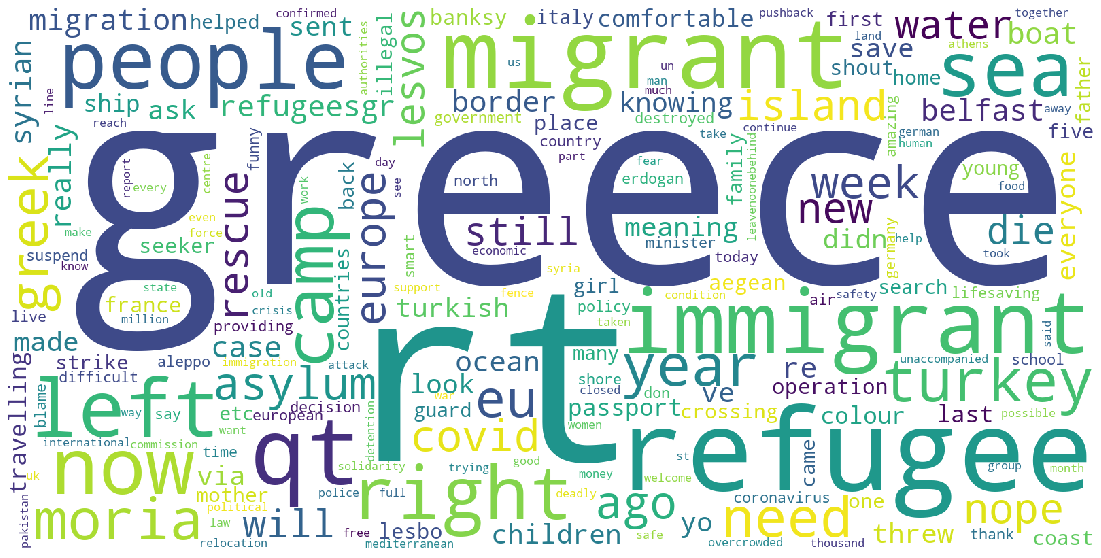

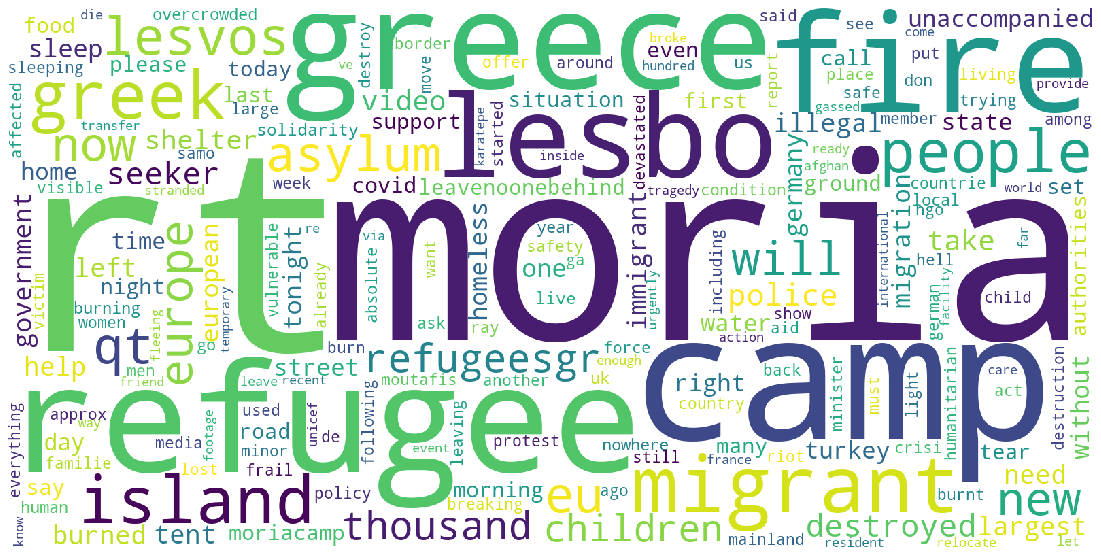

In [130]:
get_wordcloud(pre_event)

get_wordcloud(post_event)

In [131]:
import seaborn as sns

def bar_chart(dfSeries):
    plt.figure(figsize=(12,6))
    ax = dfSeries.value_counts().plot(kind = 'bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height()/dfSeries.shape[0]*100,2))+'%', (p.get_x()+0.2, p.get_height() * 0.5))


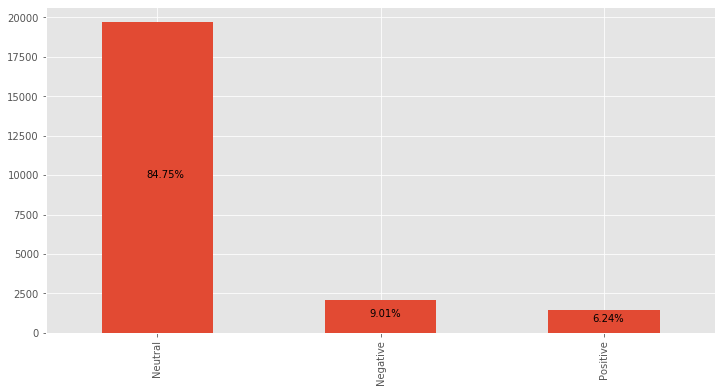

In [132]:
#we should make our own sentiment analysis

bar_chart(pre_event.Sentiment)

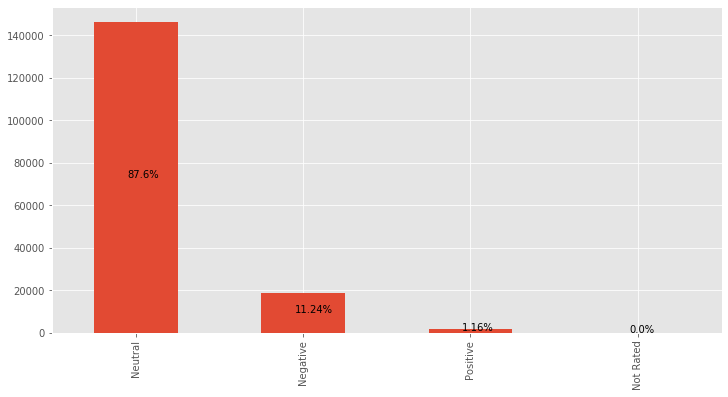

In [133]:
bar_chart(post_event.Sentiment)

In [134]:
moria_df["Country"].value_counts()

Unknown                     86027
United Kingdom              18655
United States               16865
Greece                      11941
Germany                      7958
                            ...  
Macao SAR China                 1
Turks and Caicos Islands        1
Pitcairn                        1
Sint Maarten                    1
Anguilla                        1
Name: Country, Length: 220, dtype: int64

In [135]:
moria_df['Reach'].describe()


count    1.887280e+05
mean     2.701250e+04
std      6.630101e+05
min      1.000000e+00
25%      1.490000e+02
50%      5.780000e+02
75%      2.041000e+03
max      5.865150e+07
Name: Reach, dtype: float64

In [136]:
print('Mean reach:',round(moria_df["Reach"].mean(),2))
print('Median reach:',moria_df["Reach"].median())
print('Max reach:', max(moria_df["Reach"]))

Mean reach: 27012.5
Median reach: 578.0
Max reach: 58651497


Number of Unique Reach: 17349
Reach Median: 578.0
count    1.887280e+05
mean     2.701250e+04
std      6.630101e+05
min      1.000000e+00
25%      1.490000e+02
50%      5.780000e+02
75%      2.041000e+03
max      5.865150e+07
Name: Reach, dtype: float64


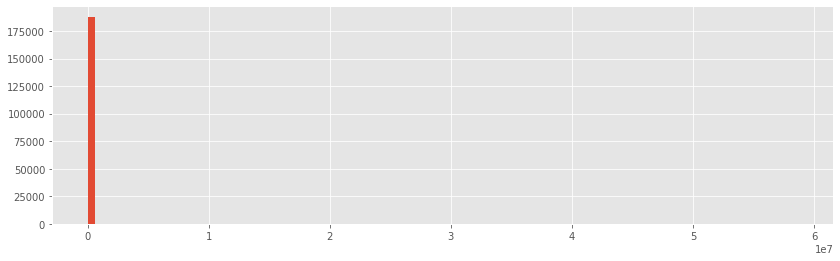

In [137]:
def plot_hist(measure = 'Reach'):
    print("Number of Unique {}: {}".format(measure, str(len(moria_df[measure].unique()))))
    print("{} Median: {}".format(measure, str(moria_df[measure].median())))
    print(moria_df[measure].describe())
    plt.figure(figsize=(14,4))
    plt.hist(moria_df[measure], bins = 100)
    plt.show()

    
plot_hist()

https://benlevyx.github.io/twitter-polling/eda/

have a similar chart but display how the sentiment/topics (or mixture = combined chart) changes over time (instead of no. of likes)

heatmap for tweets that have several topics, or in overall the correlation of events



# Word2Vec part

In [138]:
pre_event["Tweet Clean Tokens"]

Date Short
2020-08-24                                                                              [nocturnalvisio, fatihinfkm, question, case, alone, moreover, state, charity, idlib, people, life, issue, also, close, border, greece, immigrant, prefer, humanitarianism, must, abide, conclusion]
2020-08-24                                                                                [emerged, greece, employing, pushback, policy, refugee, often, abandoning, ocean, drown, anti, imperialist, paid, visit, greek, embassy, killiney, dublin, left, clear, message, protest, action]
2020-08-24                                                                                                                                                                                   [turkish, boat, forcing, migrant, greece, kmitsotakis, neademokratia, vonderleyen, commission]
2020-08-24                                                                                                [last, year, mother, helped, pl

In [153]:
from gensim.models import Word2Vec

#pre_event["Tweet Clean Tokens"]


model1 = Word2Vec(sentences=pre_event["Tweet Clean Tokens"],size = 50)

In [154]:
model1.wv.vocab


{'fatihinfkm': <gensim.models.keyedvectors.Vocab at 0x21230d9d788>,
 'question': <gensim.models.keyedvectors.Vocab at 0x21230a20f88>,
 'case': <gensim.models.keyedvectors.Vocab at 0x21237688b88>,
 'alone': <gensim.models.keyedvectors.Vocab at 0x21237688b48>,
 'moreover': <gensim.models.keyedvectors.Vocab at 0x21237688c88>,
 'state': <gensim.models.keyedvectors.Vocab at 0x212376883c8>,
 'charity': <gensim.models.keyedvectors.Vocab at 0x212376886c8>,
 'idlib': <gensim.models.keyedvectors.Vocab at 0x212376888c8>,
 'people': <gensim.models.keyedvectors.Vocab at 0x21237688888>,
 'life': <gensim.models.keyedvectors.Vocab at 0x21237688e08>,
 'issue': <gensim.models.keyedvectors.Vocab at 0x21230a16e08>,
 'also': <gensim.models.keyedvectors.Vocab at 0x21230a16608>,
 'close': <gensim.models.keyedvectors.Vocab at 0x21230a16548>,
 'border': <gensim.models.keyedvectors.Vocab at 0x21230a16d48>,
 'greece': <gensim.models.keyedvectors.Vocab at 0x21230a16508>,
 'immigrant': <gensim.models.keyedvectors.

In [168]:
model1.wv.most_similar("camp",topn=20)

[('crammed', 0.7940031290054321),
 ('covid', 0.7750828266143799),
 ('coronavirus', 0.7497680187225342),
 ('kavala', 0.7459999322891235),
 ('reported', 0.7380275726318359),
 ('infection', 0.731457531452179),
 ('overcrowded', 0.7299202680587769),
 ('case', 0.7272945642471313),
 ('confirmed', 0.7185617685317993),
 ('moria', 0.7139739990234375),
 ('structure', 0.7109401226043701),
 ('currently', 0.7084046602249146),
 ('accommodates', 0.6986006498336792),
 ('reception', 0.6971533298492432),
 ('trapped', 0.695158064365387),
 ('crowding', 0.6914275288581848),
 ('inside', 0.6888078451156616),
 ('seawatchcrew', 0.6879476308822632),
 ('leavenoonebehind', 0.6828020811080933),
 ('total', 0.6759562492370605)]

In [156]:
model2 = Word2Vec(sentences=post_event["Tweet Clean Tokens"],size = 50, window=5)

In [169]:
model2.wv.most_similar("camp",topn=20)

[('lesbos', 0.8315438628196716),
 ('moria', 0.824120044708252),
 ('fire', 0.8233548402786255),
 ('refugee', 0.8014671206474304),
 ('greece', 0.7968246936798096),
 ('migrant', 0.796680212020874),
 ('island', 0.769317626953125),
 ('greek', 0.7387939691543579),
 ('thousand', 0.6865004897117615),
 ('lesvos', 0.6492006182670593),
 ('people', 0.6279815435409546),
 ('facility', 0.5861355066299438),
 ('seeker', 0.584725022315979),
 ('moriacamp', 0.5832195281982422),
 ('news', 0.5766918659210205),
 ('overcrowded', 0.5743006467819214),
 ('around', 0.5740371942520142),
 ('blaze', 0.5643889904022217),
 ('displaced', 0.5616463422775269),
 ('plagued', 0.5614967346191406)]

#words that get retweeted the most


#doc2vec on tweets, find clusters

#how word scores have changed, which words remained

#which events "trigger" each particular group the most

#Which words define groups


we could define the biased tweets (in a similar fashion as hate speech detection), then take the words occuring there (or the ones that give most weight to bias) and compare their cosine distance in pre and post event datasets to some keywords (refugee etc.)

We could do a heatmap with words in a similar way as here:

![title](https://pytorch.org/tutorials/_images/sphx_glr_seq2seq_translation_tutorial_004.png)

found on https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html